In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

# read csv files
population_df = pd.read_csv("API_EN.POP.DNST_DS2_en_csv_v2_3052789.csv")
happ_pop21 = pd.read_csv("./csvData (3).csv")





In [2]:
# sorting data
sorted_pop = population_df.sort_values(by = "Country Name", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

sorted_pop


,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,14.044981,14.323809,14.617529,14.926281,15.250311,15.585026,...,46.131500,47.730567,49.428043,51.114793,52.712072,54.196961,55.595550,56.937049,58.269395,59.627395
1,Africa Eastern and Southern,AFE,Population density (people per sq. km of land ...,EN.POP.DNST,9.078367,9.312152,9.554904,9.806505,10.067014,10.336516,...,35.979974,36.974250,37.995279,39.040385,40.107067,41.195114,42.303709,43.431367,44.576507,45.737916
3,Africa Western and Central,AFW,Population density (people per sq. km of land ...,EN.POP.DNST,10.877837,11.109940,11.351399,11.601453,11.859717,12.126330,...,39.829118,40.929916,42.056948,43.211639,44.394917,45.607045,46.847251,48.114080,49.405535,50.720167
5,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,...,106.029015,105.854051,105.660292,105.441752,105.135146,104.967190,104.870693,104.612263,104.167555,103.567263
60,Algeria,DZA,Population density (people per sq. km of land ...,EN.POP.DNST,4.759687,4.878714,5.001721,5.131406,5.269626,5.417311,...,15.392712,15.696045,16.013559,16.342543,16.680244,17.025948,17.377697,17.730062,18.076295,18.411340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,PSE,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,NaN,NaN,NaN,NaN,NaN,...,645.014286,661.129236,677.194020,693.255482,709.317608,725.429900,740.000831,758.984551,778.290033,797.885216
259,World,WLD,Population density (people per sq. km of land ...,EN.POP.DNST,23.653719,24.061595,24.562874,25.067199,25.582392,26.121842,...,53.922141,54.562870,55.209359,55.861131,56.506298,57.130479,57.784221,58.426453,59.048771,59.660511
262,"Yemen, Rep.",YEM,Population density (people per sq. km of land ...,EN.POP.DNST,10.214660,10.367390,10.524778,10.685452,10.848618,11.016234,...,45.092687,46.353346,47.629812,48.910900,50.188232,51.457867,52.720441,53.977845,55.234051,56.491786
264,Zambia,ZMB,Population density (people per sq. km of land ...,EN.POP.DNST,4.256622,4.386184,4.519968,4.658673,4.802951,4.952922,...,18.863852,19.458357,20.079031,20.715631,21.360753,22.011930,22.671287,23.341334,24.026465,24.729894


In [3]:
sorted_happ = happ_pop21.sort_values(by = "country", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sorted_happ

,country,2021,happinessRank,happinessScore
150,Afghanistan,39835.428,154,3.203
103,Albania,2872.933,107,4.719
84,Algeria,44616.624,88,5.211
45,Argentina,45605.826,47,6.086
112,Armenia,2968.127,116,4.559
...,...,...,...,...
104,Venezuela,28704.954,108,4.707
90,Vietnam,98168.833,94,5.175
147,Yemen,30490.640,151,3.380
134,Zambia,18920.651,138,4.107


In [4]:
# rename column for merging 
sorted_pop.rename(columns={'Country Name': 'country'}, inplace=True)
sorted_pop.head()

,country,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,14.044981,14.323809,14.617529,14.926281,15.250311,15.585026,...,46.131500,47.730567,49.428043,51.114793,52.712072,54.196961,55.595550,56.937049,58.269395,59.627395
1,Africa Eastern and Southern,AFE,Population density (people per sq. km of land ...,EN.POP.DNST,9.078367,9.312152,9.554904,9.806505,10.067014,10.336516,...,35.979974,36.974250,37.995279,39.040385,40.107067,41.195114,42.303709,43.431367,44.576507,45.737916
3,Africa Western and Central,AFW,Population density (people per sq. km of land ...,EN.POP.DNST,10.877837,11.109940,11.351399,11.601453,11.859717,12.126330,...,39.829118,40.929916,42.056948,43.211639,44.394917,45.607045,46.847251,48.114080,49.405535,50.720167
5,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,...,106.029015,105.854051,105.660292,105.441752,105.135146,104.967190,104.870693,104.612263,104.167555,103.567263
60,Algeria,DZA,Population density (people per sq. km of land ...,EN.POP.DNST,4.759687,4.878714,5.001721,5.131406,5.269626,5.417311,...,15.392712,15.696045,16.013559,16.342543,16.680244,17.025948,17.377697,17.730062,18.076295,18.411340


In [12]:
# merge two population data sets to add 2021
merged_popdata = sorted_pop.merge(sorted_happ, on='country',how='left')
merged_popdata


,country,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,happinessRank,happinessScore
0,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,14.044981,14.323809,14.617529,14.926281,15.250311,15.585026,...,51.114793,52.712072,54.196961,55.595550,56.937049,58.269395,59.627395,39835.428,154.0,3.203
1,Africa Eastern and Southern,AFE,Population density (people per sq. km of land ...,EN.POP.DNST,9.078367,9.312152,9.554904,9.806505,10.067014,10.336516,...,39.040385,40.107067,41.195114,42.303709,43.431367,44.576507,45.737916,NaN,NaN,NaN
2,Africa Western and Central,AFW,Population density (people per sq. km of land ...,EN.POP.DNST,10.877837,11.109940,11.351399,11.601453,11.859717,12.126330,...,43.211639,44.394917,45.607045,46.847251,48.114080,49.405535,50.720167,NaN,NaN,NaN
3,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,...,105.441752,105.135146,104.967190,104.870693,104.612263,104.167555,103.567263,2872.933,107.0,4.719
4,Algeria,DZA,Population density (people per sq. km of land ...,EN.POP.DNST,4.759687,4.878714,5.001721,5.131406,5.269626,5.417311,...,16.342543,16.680244,17.025948,17.377697,17.730062,18.076295,18.411340,44616.624,88.0,5.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,NaN,NaN,NaN,NaN,NaN,...,693.255482,709.317608,725.429900,740.000831,758.984551,778.290033,797.885216,NaN,NaN,NaN
262,World,WLD,Population density (people per sq. km of land ...,EN.POP.DNST,23.653719,24.061595,24.562874,25.067199,25.582392,26.121842,...,55.861131,56.506298,57.130479,57.784221,58.426453,59.048771,59.660511,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,Population density (people per sq. km of land ...,EN.POP.DNST,10.214660,10.367390,10.524778,10.685452,10.848618,11.016234,...,48.910900,50.188232,51.457867,52.720441,53.977845,55.234051,56.491786,NaN,NaN,NaN
264,Zambia,ZMB,Population density (people per sq. km of land ...,EN.POP.DNST,4.256622,4.386184,4.519968,4.658673,4.802951,4.952922,...,20.715631,21.360753,22.011930,22.671287,23.341334,24.026465,24.729894,18920.651,138.0,4.107


In [13]:
# Create new empty dataframe for population data
populationsDf = pd.DataFrame(columns = ["Country", "Year", "Population density (people per sq. km of land area)"])

# Append a new row to the new dataframe for every row/year combination in originaal dataframe
for index, row in merged_popdata.iterrows():
    for year in range(2015, 2021):
        if str(year) in merged_popdata.columns:
            newrow = [row["country"], year, row[str(year)]]
            populationsDf.loc[len(populationsDf)] = newrow

populationsDf

,Country,Year,Population density (people per sq. km of land area)
0,Afghanistan,2015,52.712072
1,Afghanistan,2016,54.196961
2,Afghanistan,2017,55.595550
3,Afghanistan,2018,56.937049
4,Afghanistan,2019,58.269395
...,...,...,...
1591,Zimbabwe,2016,36.268161
1592,Zimbabwe,2017,36.801342
1593,Zimbabwe,2018,37.324058
1594,Zimbabwe,2019,37.858273


In [14]:
happData = pd.read_csv("WHR2015-21.csv")
happData

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.8573,0.9531,72.7369,0.9477,0.0807,0.3014
1,Iceland,7.561,2,2015,10.5685,0.9752,72.9686,0.9128,0.2579,0.7418
2,Denmark,7.527,3,2015,10.6395,0.9578,70.3234,0.9324,0.1374,0.2004
3,Norway,7.522,4,2015,11.0489,0.9454,70.7053,0.9517,0.1445,0.3880
4,Canada,7.427,5,2015,10.6420,0.9419,71.4432,0.9168,0.2856,0.4441
...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,3.512,145,2021,7.9260,0.7870,48.7000,0.7150,-0.1310,0.9150
1080,Botswana,3.467,146,2021,9.7820,0.7840,59.2690,0.8240,-0.2460,0.8010
1081,Rwanda,3.415,147,2021,7.6760,0.5520,61.4000,0.8970,0.0610,0.1670
1082,Zimbabwe,3.145,148,2021,7.9430,0.7500,56.2010,0.6770,-0.0470,0.8210


In [15]:
happPop_data = populationsDf.merge(happData, on=['Country','Year'],how='left')
happPop_data.head()

,Country,Year,Population density (people per sq. km of land area),Score,Rank,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,52.712072,3.575,153.0,7.5563,0.5144,49.6801,0.5384,0.1675,0.8119
1,Afghanistan,2016,54.196961,3.360,154.0,0.3823,0.1104,0.1734,0.1643,0.3127,0.0711
2,Afghanistan,2017,55.595550,3.794,141.0,0.4010,0.5820,0.1810,0.1060,0.3120,0.0610
3,Afghanistan,2018,56.937049,3.632,145.0,0.3320,0.5370,0.2550,0.0850,0.1910,0.0360
4,Afghanistan,2019,58.269395,3.203,154.0,0.3500,0.5170,0.3610,0.0000,0.1580,0.0250


In [16]:
# drop Nan values
popHapp_data = happPop_data.dropna()

In [17]:
# write data to csv file
popHapp_data.to_csv("HappinessandPopulation.csv")

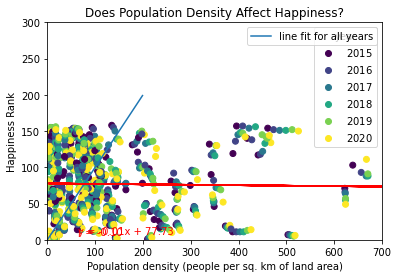

<Figure size 432x288 with 0 Axes>

In [22]:
# showing popluation density in relation to happiness rank

fig, ax = plt.subplots()
plt.plot(range(200))

plt.xlim(0, 700)
plt.ylim(0, 300)

(m, b, r, p, stderr) = linregress(popHapp_data['Population density (people per sq. km of land area)'], popHapp_data["Rank"])
y_regress = m * popHapp_data['Population density (people per sq. km of land area)'] + b

# Plot line of regression
plt.plot(popHapp_data['Population density (people per sq. km of land area)'], y_regress, color="red", label = "line fit for all years")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(65, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(65, 7.0))

# create scatter plot 
b = plt.scatter(popHapp_data['Population density (people per sq. km of land area)'], popHapp_data["Rank"],c=popHapp_data['Year'])
legend = plt.legend(*b.legend_elements(), title ='year')
ax.add_artist(legend)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend([b],labels=['line fit for all years'])

plt.title("Does Population Density Affect Happiness?")
plt.xlabel('Population density (people per sq. km of land area)')
plt.ylabel("Happiness Rank")
plt.show()

plt.savefig("populationandhappinessrank.png")

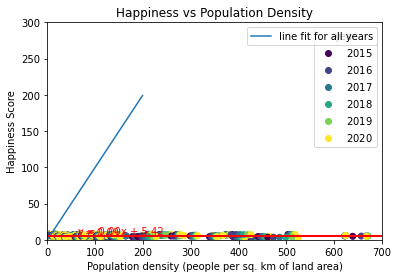

In [23]:
# showing population density in relation to happiness score


fig, ax = plt.subplots()
plt.plot(range(200))

plt.xlim(0, 700)
plt.ylim(0, 300)

(m, b, r, p, stderr) = linregress(popHapp_data['Population density (people per sq. km of land area)'], popHapp_data["Score"])
y_regress = m * popHapp_data['Population density (people per sq. km of land area)'] + b

# Plot line of regression
plt.plot(popHapp_data['Population density (people per sq. km of land area)'], y_regress, color="red", label = "line fit for all years")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(65, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(65, 7.0))

#plot scatter 


b = plt.scatter(popHapp_data['Population density (people per sq. km of land area)'], popHapp_data["Score"],c=popHapp_data['Year'])
legend = plt.legend(*b.legend_elements(), title ='year')
ax.add_artist(legend)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend([b],labels=['line fit for all years'])

plt.title("Happiness vs Population Density")
plt.xlabel('Population density (people per sq. km of land area)')
plt.ylabel("Happiness Score")
plt.savefig("populationandhappinessscore.png")
plt.show()
